# PACKAGES USED

---



---



In [0]:
import pandas as pd
import numpy as np
import seaborn as sbn
import nltk
import re
import matplotlib.pyplot as plt
import datetime
!pip install mglearn
import mglearn

nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 

from google.colab import drive

     |████████████████████████████████| 542kB 6.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=777f048e41d54d5c299e95f1c4995e8655b4faeca8254e87752f92bb6d2ce80a
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# DATA UPLOAD

In [0]:
train = pd.read_csv('train.csv')

In [0]:
test = pd.read_csv('test.csv')

If running on colab run the below code

In [0]:
train = pd.read_csv('/content/drive/My Drive/MSC SEM 2 - 2020/F21AA_Applied Text Analytics/CW 1 010320/train.csv')

In [0]:
test = pd.read_csv('/content/drive/My Drive/MSC SEM 2 - 2020/F21AA_Applied Text Analytics/CW 1 010320/test.csv')

In [0]:
test_labels = pd.read_csv('/content/drive/My Drive/MSC SEM 2 - 2020/F21AA_Applied Text Analytics/CW 1 010320/labels.csv')

# DATA EXPLORATION AND VISULIZATION

In [0]:
print(train.shape)
print(test.shape)

(426340, 10)
(142114, 9)


In [0]:
# return the dtype of each column 
result = train.dtypes
print(result)

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object


In [0]:
#checking for missing data in train
total_train = train.isnull().sum().sort_values(ascending=False)
percent_train = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=['Total', 'Percent'])
missing_data_train.head(20)

,Total,Percent
Summary,20,0.000047
ProfileName,14,0.000033
Text,0,0.000000
Time,0,0.000000
Score,0,0.000000
HelpfulnessDenominator,0,0.000000
HelpfulnessNumerator,0,0.000000
UserId,0,0.000000
ProductId,0,0.000000
Id,0,0.000000


In [0]:
#checking for missing data in test
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

,Total,Percent
Summary,7,0.000049
ProfileName,2,0.000014
Text,0,0.000000
Time,0,0.000000
HelpfulnessDenominator,0,0.000000
HelpfulnessNumerator,0,0.000000
UserId,0,0.000000
ProductId,0,0.000000
Id,0,0.000000


In [0]:
#replacing null feilds in Summary with blank
train.Summary.fillna('', inplace=True)
test.Summary.fillna('',inplace=True)
#replacing null profile name with NA
train.ProfileName.fillna('NA', inplace=True)
test.ProfileName.fillna('NA', inplace=True)

In [0]:
#checking for missing data in train
total_train = train.isnull().sum().sort_values(ascending=False)
percent_train = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=['Total', 'Percent'])
missing_data_train.head(20)

,Total,Percent
Text,0,0.0
Summary,0,0.0
Time,0,0.0
Score,0,0.0
HelpfulnessDenominator,0,0.0
HelpfulnessNumerator,0,0.0
ProfileName,0,0.0
UserId,0,0.0
ProductId,0,0.0
Id,0,0.0


In [0]:
#checking for missing data in test
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

,Total,Percent
Text,0,0.0
Summary,0,0.0
Time,0,0.0
HelpfulnessDenominator,0,0.0
HelpfulnessNumerator,0,0.0
ProfileName,0,0.0
UserId,0,0.0
ProductId,0,0.0
Id,0,0.0


In [0]:
#Concating the Summary and Text Feilds together into summary_text
train['summary_text'] = train['Summary'] + ' ' + train['Text']
test['summary_text'] = test['Summary'] + ' ' + test['Text']

In [0]:
train.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'summary_text'],
      dtype='object')

In [0]:
test.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'summary_text'],
      dtype='object')

In [0]:
#del train['summary_text_pp']

In [0]:
#creating date time frame from time date 
train['datetime'] = train['Time'].map(lambda x: (datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')))
train['datetime'] = pd.to_datetime(train['datetime'])

In [0]:
#Creating timeframe dataset for visualization of different feilds over time
timeframe = train.copy()
timeframe.set_index('datetime', inplace=True)

In [0]:
#splitting data in different year sets
TF2012 = timeframe.loc['2012-1-01':'2012-12-31']
TF1 = [TF2012['Score'].mean(), 
TF2012['HelpfulnessNumerator'].mean(),
TF2012['HelpfulnessDenominator'].mean(), 
len(TF2012),TF2012['ProductId'].nunique()]

TF2011 = timeframe.loc['2011-1-01':'2011-12-31']
TF2 = [ TF2011['Score'].mean(), 
TF2011['HelpfulnessNumerator'].mean(),
TF2011['HelpfulnessDenominator'].mean(), len(TF2011), 
TF2011['ProductId'].nunique()]

TF2010 = timeframe.loc['2010-1-01':'2010-12-31']
TF3 = [TF2010['Score'].mean(), 
TF2010['HelpfulnessNumerator'].mean(),
TF2010['HelpfulnessDenominator'].mean(), len(TF2010), 
TF2010['ProductId'].nunique()]

TF2009 = timeframe.loc['2009-1-01':'2009-12-31']
TF4 = [ TF2009['Score'].mean(), 
TF2009['HelpfulnessNumerator'].mean(),
TF2009['HelpfulnessDenominator'].mean(), len(TF2009), 
TF2009['ProductId'].nunique()]

TF2008 = timeframe.loc['2008-1-01':'2008-12-31']
TF5 = [TF2008['Score'].mean(), 
TF2008['HelpfulnessNumerator'].mean(),
TF2008['HelpfulnessDenominator'].mean(), len(TF2008), 
TF2008['ProductId'].nunique()]

In [0]:
#for visulization
trainTF = pd.DataFrame([TF5,TF4, TF3, TF2, TF1], index=['2008', '2009', '2010', '2011', '2012'], columns =['mean Score', 'mean HNum', 'mean HDen', 'count', 'num_products'])

In [0]:
trainTF.head()

,mean Score,mean HNum,mean HDen,count,num_products
2008,4.345194,3.244304,4.021926,25632,9141
2009,4.300149,2.931479,3.685091,41666,13699
2010,4.200811,2.319850,2.968500,64349,20254
2011,4.142409,1.512412,1.952569,122345,31655
2012,4.118432,0.578500,0.805276,148980,41409


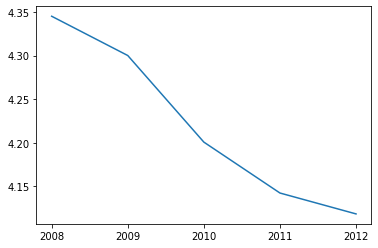

In [0]:
plt.plot(trainTF.index,trainTF['mean Score'])

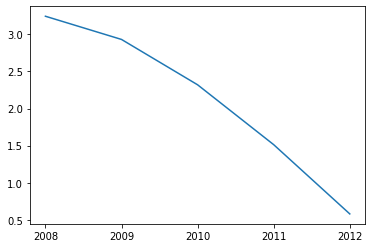

In [0]:
plt.plot(trainTF.index,trainTF['mean HNum'])

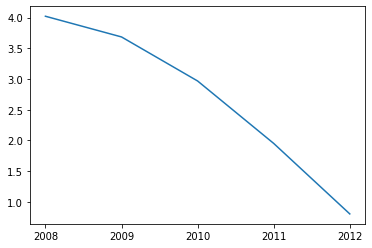

In [0]:
plt.plot(trainTF.index,trainTF['mean HDen'])

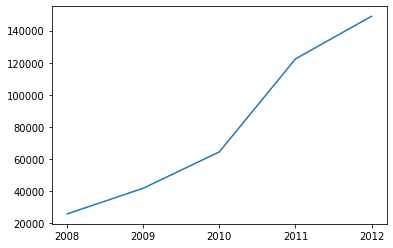

In [0]:
plt.plot(trainTF.index,trainTF['count'])

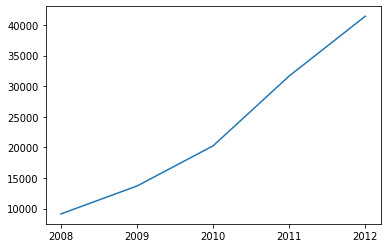

In [0]:
plt.plot(trainTF.index,trainTF['num_products'])

In [0]:
train['HelpfulnessNumerator'].describe()

count    426340.000000
mean          1.733159
std           7.328184
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         844.000000
Name: HelpfulnessNumerator, dtype: float64

In [0]:
train['HelpfulnessDenominator'].describe()

count    426340.000000
mean          2.220244
std           8.014894
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         923.000000
Name: HelpfulnessDenominator, dtype: float64

In [0]:
train['Helpful %'] = np.where(train['HelpfulnessDenominator'] > 0, train['HelpfulnessNumerator'] / train['HelpfulnessDenominator'], -1)
train['% Upvote'] = pd.cut(train['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
train.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,summary_text,datetime,review_len,word_count,summary_text_pp,summary_text_pp_lc,numerics,count_of_stopwords,Helpful %,% Upvote
0,220291,B0034EDLS2,AVF82BC7S0IO7,Kbrown,0,0,5,1332806400,Very Good,I received this product early from the seller!...,Very Good I received this product early from t...,2012-03-27,207,40,Very Good I received this product early from t...,very good i received this product early from t...,0,17,-1.0,Empty
1,225833,B001I7HJE4,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1190160000,"Organic, Kosher, Tasty Assortment of Premium T...",*****<br />Numi's Collection Assortment Melang...,"Organic, Kosher, Tasty Assortment of Premium T...",2007-09-19,1998,319,"Organic, Kosher, Tasty Assortment of Premium T...","organic, kosher, tasty assortment of premium t...",0,94,1.0,80-100%
2,350901,B000LKTB90,A1BBPP1EC75JX4,"Johan Bollen ""gekhond""",0,0,5,1285977600,"excellent gluten-free spaghetti: great taste, ...","I was very careful not to overcook this pasta,...","excellent gluten-free spaghetti: great taste, ...",2010-10-02,1146,204,"excellent gluten-free spaghetti: great taste, ...","excellent gluten-free spaghetti: great taste, ...",3,84,-1.0,Empty
3,299801,B001HXJPS2,A5QSI9MNS8NMS,M. Esaili,0,0,5,1338163200,Lindt is Lindt,Buying this multi-pack I was misled by the pic...,Lindt is Lindt Buying this multi-pack I was mi...,2012-05-28,201,34,Lindt is Lindt Buying this multi-pack I was mi...,lindt is lindt buying this multi-pack i was mi...,0,11,-1.0,Empty
4,48472,B006H34CUS,A20IBAIRSNBEAQ,Chelsea,0,0,5,1343606400,YUM!!!!!,These bars are so good! I loved them warmed up...,YUM!!!!! These bars are so good! I loved them ...,2012-07-30,164,29,YUM!!!!! These bars are so good! I loved them ...,yum!!!!! these bars are so good! i loved them ...,0,10,-1.0,Empty


Text(0.5, 1, 'How helpful users find among user scores')

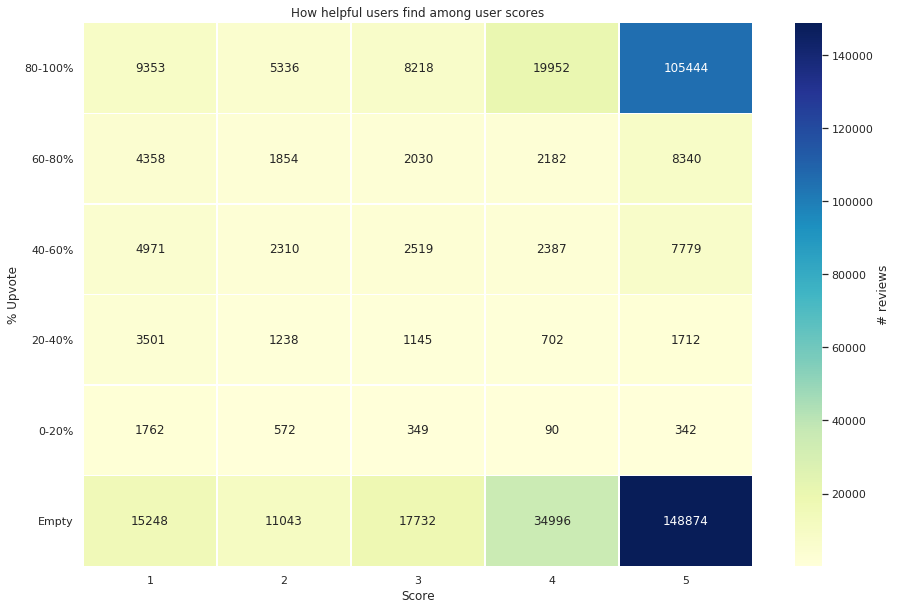

In [0]:
df_s = train.groupby(['Score', '% Upvote']).agg({'Id': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sbn.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')

In [0]:
#to check the distribution of Score Column
train['Score'].describe()

count    426340.000000
mean          4.183455
std           1.310577
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

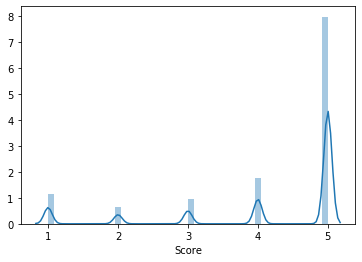

In [0]:
#visualing the distubution of Score
sbn.distplot(train['Score'])

In [0]:
test_labels['Score'].describe()

count    142114.000000
mean          4.182431
std           1.310017
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

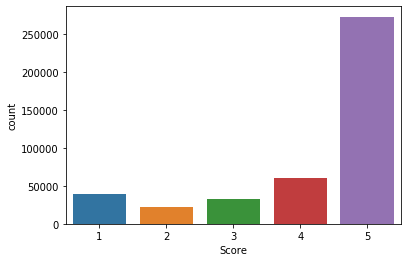

In [0]:
sbn.countplot(x='Score',data=train)

In [0]:
#scatterplot
sbn.set()
cols = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score']
sbn.pairplot(train[cols], height = 2.5)
plt.show();

In [0]:
#to record the lenght of the review 
train['review_len'] = train['summary_text'].astype(str).apply(len)

#to record the word count of the review
train['word_count'] = train['summary_text'].apply(lambda x: len(str(x).split()))

In [0]:
train['review_len'].describe()

count    426340.000000
mean        459.840942
std         448.414649
min          23.000000
25%         200.000000
50%         325.000000
75%         554.000000
max       21535.000000
Name: review_len, dtype: float64

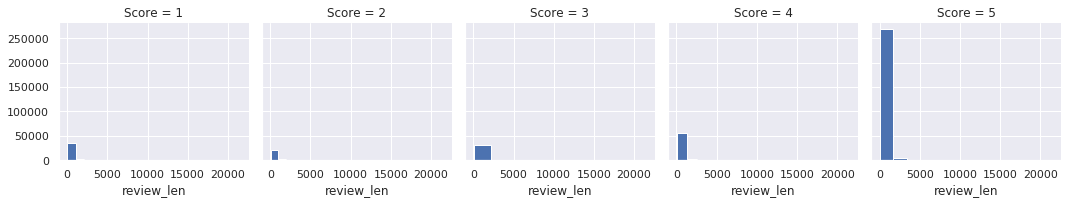

In [0]:
g = sbn.FacetGrid(train, col="Score")
g = g.map(plt.hist, "review_len")

In [0]:
score = train.copy()
score.head()

In [0]:
score_vis = score.groupby('Score').mean()
score_vis

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time,review_len,word_count
Score,,,,,,
1,282904.535606,2.747812,4.903171,1.303158e+09,501.748067,91.314291
2,280643.847850,1.864627,3.097079,1.301144e+09,515.026887,94.271328
3,279476.092333,1.733817,2.498390,1.300218e+09,545.655112,100.073391
4,281941.848729,1.379910,1.655491,1.296626e+09,522.622212,95.865741
5,285890.169021,1.654540,1.854763,1.294262e+09,425.316017,77.955202


In [0]:
score_vis.corr()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time,review_len,word_count
Id,1.000000,0.064944,-0.105697,-0.585760,-0.953175,-0.956479
HelpfulnessNumerator,0.064944,1.000000,0.979529,0.760291,0.001865,-0.033182
HelpfulnessDenominator,-0.105697,0.979529,1.000000,0.866456,0.163523,0.128745
Time,-0.585760,0.760291,0.866456,1.000000,0.600802,0.574231
review_len,-0.953175,0.001865,0.163523,0.600802,1.000000,0.999354
word_count,-0.956479,-0.033182,0.128745,0.574231,0.999354,1.000000


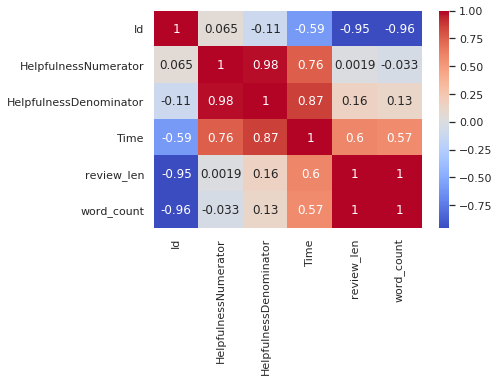

In [0]:
sbn.heatmap(score_vis.corr(),cmap='coolwarm',annot= True)

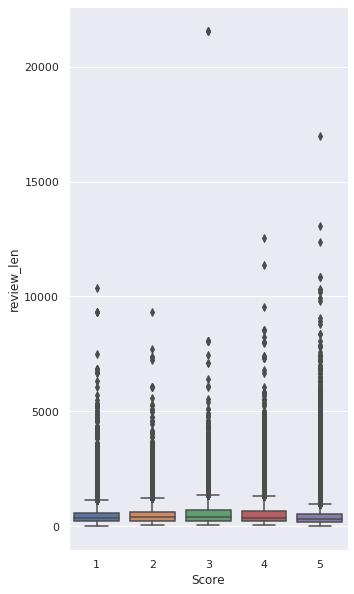

In [0]:
plt.figure(figsize=(5,10))
sbn.boxplot(x='Score', y='review_len',data=train)

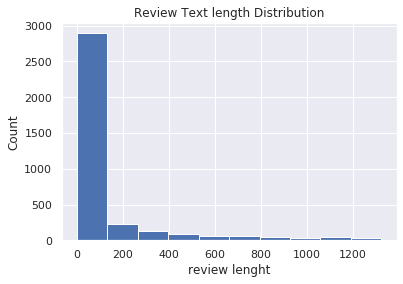

In [0]:
train['review_len'].value_counts().plot(
    kind='hist',
    title='Review Text length Distribution')
plt.xlabel('review lenght')
plt.ylabel('Count')
plt.show()

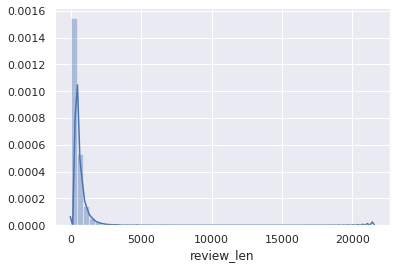

In [0]:
sbn.distplot(train['review_len'])

In [0]:
train['word_count'].describe()

count    426340.000000
mean         84.232096
std          79.927476
min           4.000000
25%          37.000000
50%          60.000000
75%         102.000000
max        3451.000000
Name: word_count, dtype: float64

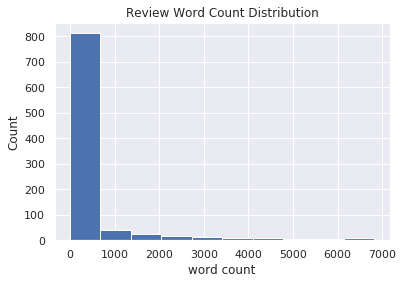

In [0]:
train['word_count'].value_counts().plot(
    kind='hist',
    title='Review Word Count Distribution')
plt.xlabel('word count')
plt.ylabel('Count')
plt.show()

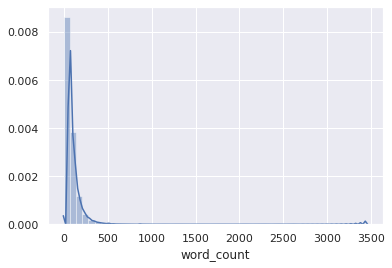

In [0]:
sbn.distplot(train['word_count'])